# Earthquake Prediction

Accurately predicting earthquakes is crucial for mitigating their impacts on human lives and infrastructure. Despite advances in seismology, the complexity of seismic activity makes reliable prediction challenging. This project aims to develop an earthquake prediction model using machine learning techniques on a dataset of Indian earthquake records from 2018 to 2021, analyzing attributes like date, time, location, depth, magnitude, and source to identify predictive patterns.

By leveraging data preprocessing and machine learning algorithms, this project seeks to enhance prediction accuracy. The goal is to provide a tool for early warnings and improved disaster preparedness, contributing to the safety and resilience of earthquake-prone communities. This effort aims to advance seismology and offer practical solutions for earthquake risk mitigation.

## Dataset

### Indian-earthquake dataset (2019-2021)

https://www.kaggle.com/datasets/parulpandey/indian-earthquakes-dataset2018-onwards

This dataset includes a record of the date, time, location, depth, magnitude, and source of every Indian earthquake from 2019 to 2021.


**Key Features**:

* Origin Time
* Magnitude
* Location
* Longitude
* Latitude
* Depth



In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle as pickle
import os



Loading dataset

In [ ]:
data = pd.read_csv('/bin/Dataset/Indian_earthquake_data.csv')

In [ ]:

import warnings
warnings.filterwarnings('ignore')

Data Overview

In [ ]:
data.head()

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location
0,2021-07-31 09:43:23 IST,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India"
1,2021-07-30 23:04:57 IST,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India"
2,2021-07-30 21:31:10 IST,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India"
3,2021-07-30 13:56:31 IST,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana"
4,2021-07-30 07:19:38 IST,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan"


In [ ]:
data.tail()

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location
2714,2019-08-04 06:56:19 IST,12.3,94.8,10.0,4.8,"224km ESE of Diglipur, Andaman and Nicobar isl..."
2715,2019-08-04 05:40:33 IST,24.7,94.3,40.0,4.1,"31km SW of Ukhrul, Manipur, India"
2716,2019-08-03 16:29:37 IST,22.5,88.1,10.0,3.6,"28km WSW of Kolkata, India"
2717,2019-08-03 01:59:11 IST,24.6,94.2,54.0,3.5,"35km SE of Imphal, Manipur, India"
2718,2019-08-01 06:13:21 IST,14.5,92.9,10.0,4.6,"137km N of Diglipur, Andaman and Nicobar islan..."


In [ ]:
data.describe()

,Latitude,Longitude,Depth,Magnitude
count,2719.000000,2719.000000,2719.000000,2719.000000
mean,29.939433,80.905638,53.400478,3.772196
std,7.361564,10.139075,68.239737,0.768076
min,0.120000,60.300000,0.800000,1.500000
25%,25.700000,71.810000,10.000000,3.200000
50%,31.210000,76.610000,15.000000,3.900000
75%,36.390000,92.515000,82.000000,4.300000
max,40.000000,99.960000,471.000000,7.000000


In [ ]:
data.columns.tolist()

['Origin Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location']

In [ ]:
data.nunique()

,0
Origin Time,2717
Latitude,1238
Longitude,1303
Depth,269
Magnitude,50
Location,2299


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Origin Time  2719 non-null   object 
 1   Latitude     2719 non-null   float64
 2   Longitude    2719 non-null   float64
 3   Depth        2719 non-null   float64
 4   Magnitude    2719 non-null   float64
 5   Location     2719 non-null   object 
dtypes: float64(4), object(2)
memory usage: 127.6+ KB


In [ ]:
data.isnull().sum()

,0
Origin Time,0
Latitude,0
Longitude,0
Depth,0
Magnitude,0
Location,0


In [ ]:
data.isnull().sum().values.sum()

0

Exploratory Data Analysis

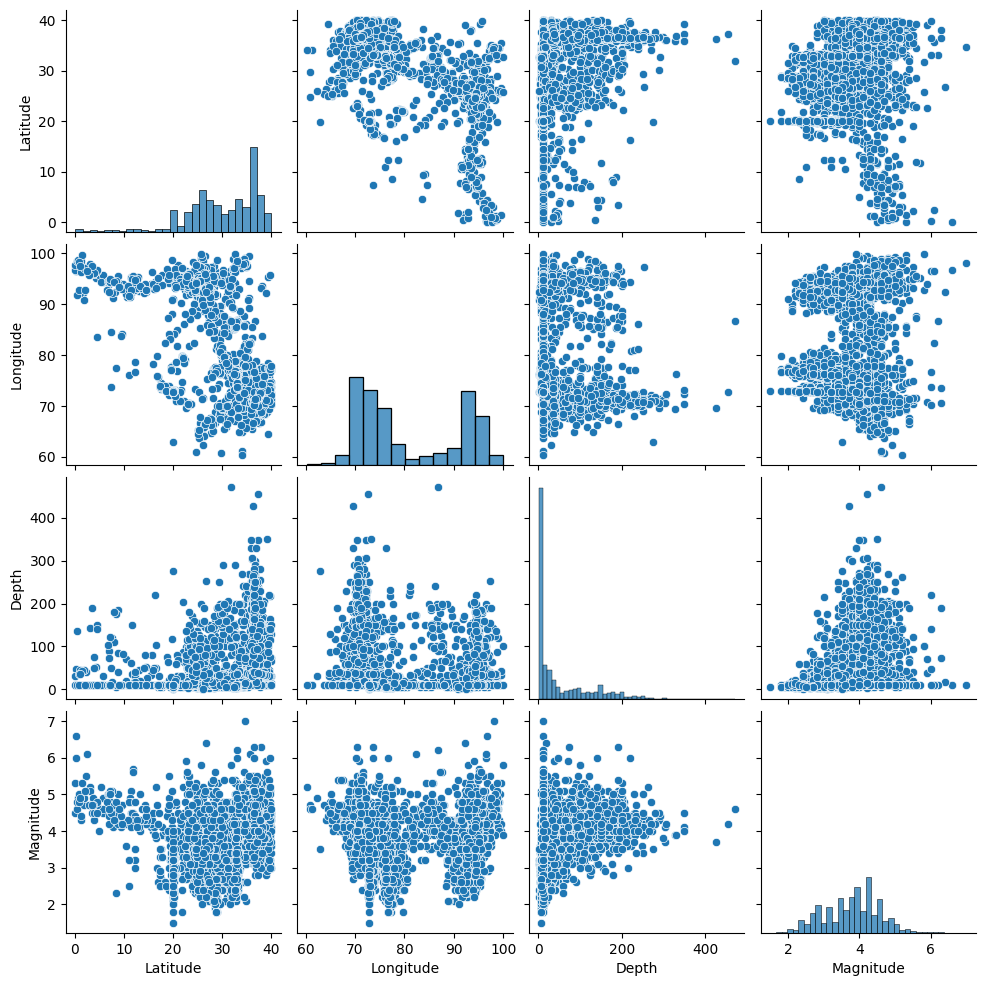

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
data= data.dropna()

In [ ]:
data.shape

(137771, 12)

Analysing what type of data in each variable

In [ ]:
data.dtypes

,0
Origin Time,object
Latitude,float64
Longitude,float64
Depth,float64
Magnitude,float64
Location,object


Checking the occurence of earthquake

Min date: 2019-08-01 06:13:21 IST
Max date: 2021-07-31 09:43:23 IST


<ipython-input-47-ad2d4d241e01>:6: FutureWarning: Parsed string "2021-07-31 09:43:23 IST" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  data_year['Origin Time'] = pd.to_datetime(data_year['Origin Time'], errors='coerce')


<Axes: xlabel='Year', ylabel='No. of Earthquakes'>

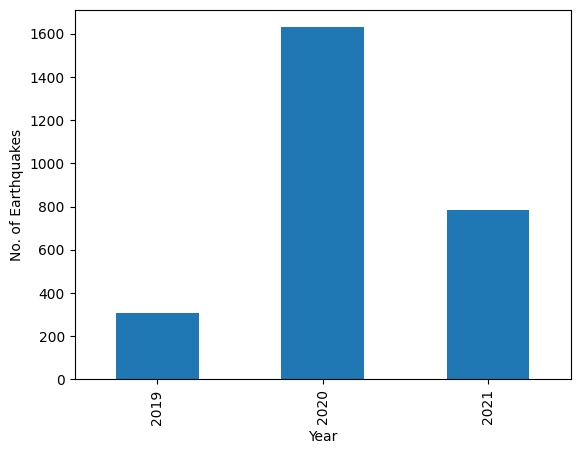

In [ ]:
print(f"Min date: {data['Origin Time'].min()}")
print(f"Max date: {data['Origin Time'].max()}")
data_year = data.copy()

# Convert the 'origin time' column to datetime, coerce errors to NaT
data_year['Origin Time'] = pd.to_datetime(data_year['Origin Time'], errors='coerce')

# Check for any NaT values and handle them (e.g., by dropping them)
if data_year['Origin Time'].isna().sum() > 0:
    print(f"Number of invalid dates: {data_year['Origin Time'].isna().sum()}")
    data_year = data_year.dropna(subset=['Origin Time'])
# data_year["Origin Time"] = data_year["Origin Time"].astype("datetime64[ns]")
data_year["Origin Time"].groupby([data_year["Origin Time"].dt.year]).count().plot(kind="bar", xlabel = 'Year', ylabel = 'No. of Earthquakes')

In [ ]:
data.rename(columns={'Origin Time': 'Origin_Time'}, inplace=True)


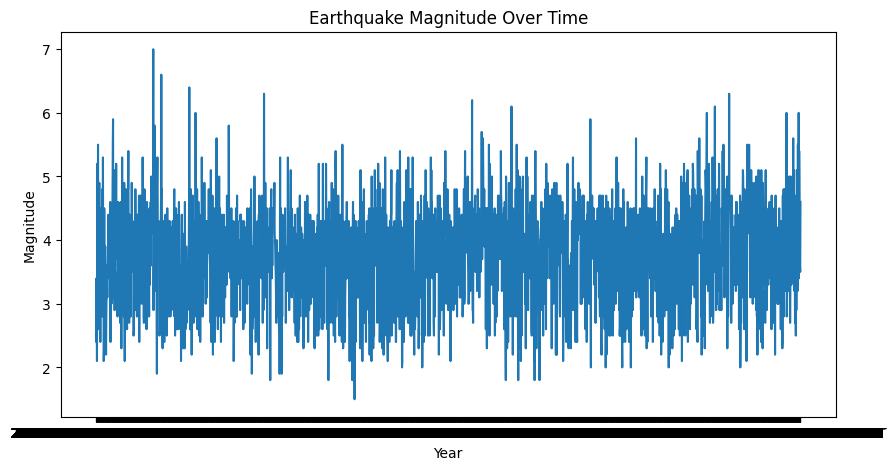

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data.Origin_Time,data.Magnitude)
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.title('Earthquake Magnitude Over Time')
plt.show()

Preprocessing

In [ ]:
#Split dataset into X and y
X = data[['Latitude','Longitude', 'Depth']]
y = data['Magnitude']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, shuffle=True, random_state=1)


#Scaler X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_train.columns)


In [142]:
import os
import pickle

scaler_filename = '../models/scaler.pkl'
#Create the 'models' directory if it doesn't exist
os.makedirs(os.path.dirname(scaler_filename), exist_ok=True)

# Save the scaler to a file
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [143]:
X_train

,Latitude,Longitude,Depth
962,-1.027670,-0.143871,-0.615996
709,-0.301482,1.205224,-0.630351
2509,-0.561204,-1.308010,0.934324
2078,0.808474,-1.031069,3.575611
1807,-0.716262,1.263579,-0.357609
...,...,...,...
960,-1.242167,-0.798637,-0.716480
905,0.814935,-1.009310,-0.644706
1096,0.866621,-1.027113,1.264485
235,-0.145132,-0.395096,-0.716480


In [144]:
y_train

,Magnitude
962,3.4
709,3.5
2509,4.5
2078,4.1
1807,3.4
1364,3.5
1923,3.7
457,4.3
1199,4.6
1573,4.5


In [145]:
import os
import pickle

#saving the processed data
path = '../data/processed/'

# Create the directory if it doesn't exist
os.makedirs(path, exist_ok=True)

X_train.to_csv(path + 'X_train.csv', index=False)
y_train.to_csv(path + 'y_train.csv', index=False)



 ## Model Building

### Linear Regression

In [151]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

# Fit the model to the training data
linear_regression_model.fit(X_train, y_train)


LinearRegression()

In [190]:
scores= {"Model name": ["Linear regression", "SVM", "Random Forest"], "mse": [], "R^2": []}

In [202]:
# Linear Regression Model Performance Metrics

print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

#Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

#Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

scores["mse"].append(mse)
scores["R^2"].append(r2)

Linear Regression Model Performance Metrics:

Mean Squared Error (MSE): 0.5246235529221939
Root Mean Squared Error (RMSE): 0.7243090175623895
Mean Absolute Error (MAE): 0.5824163981348179
R-squared Score: 0.1025926343478506


Predict for new data



In [156]:
# Predict on new data
# Input = Latitude, Logitude, Depth
# Output = Magnitude
new_data = [[33.89, -118.40, 16.17], [37.77, -122.42, 8.05]]
new_pred = linear_regression_model.predict(new_data)
print("New predictions:", new_pred)

New predictions: [5.56378335 3.13825686]


### Plot multiple linear regression model

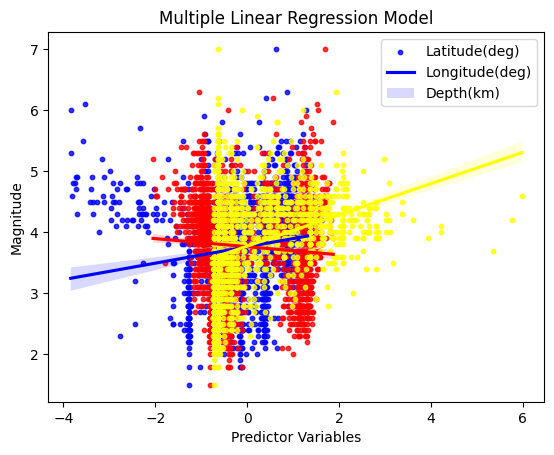

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the regression line
sns.regplot(x=X_test['Latitude'], y=y_test, color='blue', scatter_kws={'s': 10})
sns.regplot(x=X_test['Longitude'], y=y_test, color='red', scatter_kws={'s': 10})
sns.regplot(x=X_test['Depth'], y=y_test, color='yellow', scatter_kws={'s': 10})
plt.legend(labels=['Latitude(deg)', 'Longitude(deg)', 'Depth(km)'])
plt.xlabel('Predictor Variables')
plt.ylabel('Magnitude')
plt.title('Multiple Linear Regression Model')
plt.show()

### SVM

In [159]:
# Loading the model and fitting it with training data

from sklearn.svm import SVR

# Select a subset of the training data
subset_size = 500
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Create an SVM model
svm = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the SVM model on the subset of data
svm.fit(X_train_subset, y_train_subset)

# Evaluate the model on the test set
score = svm.score(X_test, y_test)
print("Test score:", score)

Test score: 0.36751124533166657


In [193]:
# Predict on the testing set
y_pred_svm = svm.predict(X_test)

# Compute R^2 and MSE
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

scores["mse"].append(mse_svm)
scores["R^2"].append(r2_svm)


print("SVM R^2: {:.2f}, MSE: {:.2f}".format(r2_svm, mse_svm))

SVM R^2: 0.37, MSE: 0.37


In [164]:
#Predict for new data

new_pred_svm = svm.predict(new_data)
print("New SVM predictions:", new_pred_svm)


New SVM predictions: [4.76680232 4.76680232]


### Random Forest

In [171]:
# Loading the model and fitting it with training data

from sklearn.ensemble import RandomForestRegressor

# Initialize a random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [204]:
# Predict the target variable on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using mean squared error and R^2 score
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

scores["mse"].append(mse_rf)
scores["R^2"].append(r2_rf)

print('Mean Squared Error: ', mse_rf)
print('R^2 Score: ', r2_rf)

Mean Squared Error:  0.3169632315154068
R^2 Score:  0.45781096365488727


#### Scatter Plot

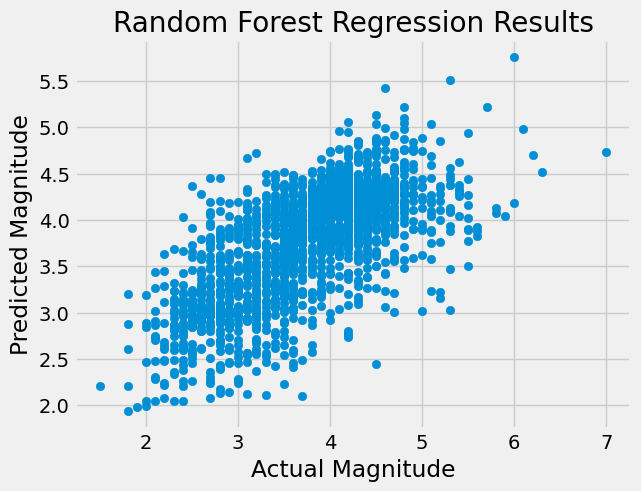

In [173]:
# Plot the predicted and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Random Forest Regression Results')
plt.show()

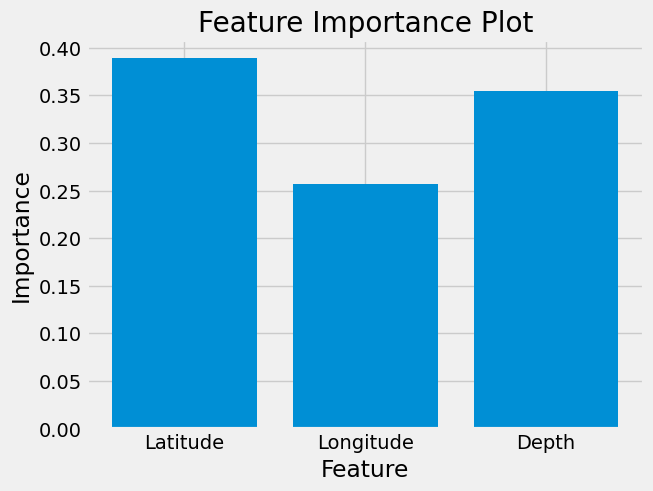

In [175]:
#Feature Importance

importances = rf.feature_importances_
features = ['Latitude', 'Longitude', 'Depth']
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

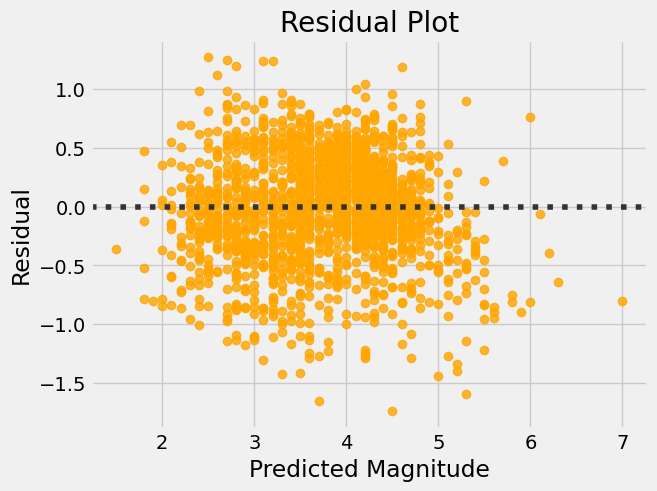

In [183]:
# Residual Plot

import seaborn as sns
sns.residplot(x= y_test, y =y_pred, color='orange')
plt.xlabel('Predicted Magnitude')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

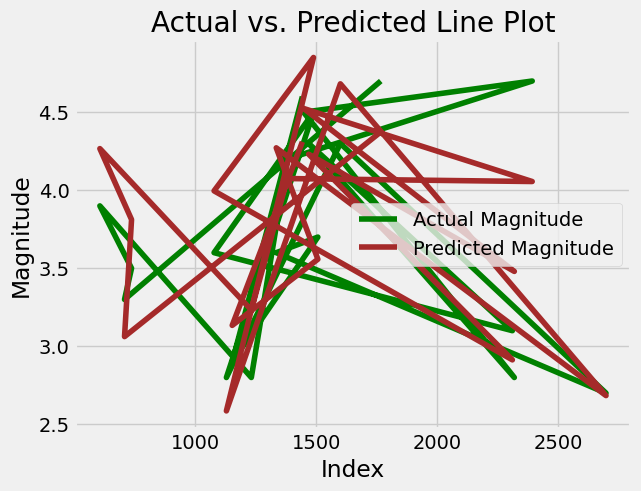

In [188]:
# Actual vs. Predicted Line Plot
plt.plot(y_test.index[:20], y_test[:20], color='green', label='Actual Magnitude')
plt.plot(y_test.index[:20], y_pred[:20], color='brown', label='Predicted Magnitude')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.title('Actual vs. Predicted Line Plot')
plt.legend()
plt.show()

In [209]:
print("Linear Regression scores :\n")
print("Mean Squared Error :", mse)
print("R^2 Score :", r2)

print("\nSVM scores :\n")
print("Mean Squared Error :", mse_svm)
print("R^2 Score :", r2_svm)

print("\nRandom Forest scores :\n")
print("Mean Squared Error :", mse_rf)
print("R^2 Score :", r2_rf)

Linear Regression scores :

Mean Squared Error : 0.5246235529221939
R^2 Score : 0.1025926343478506

SVM scores :

Mean Squared Error : 0.36975236704938474
R^2 Score : 0.36751124533166657

Random Forest scores :

Mean Squared Error : 0.3169632315154068
R^2 Score : 0.45781096365488727


Thus, mse of random forest is the lowest and gives the best result